In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the Data

In [3]:
hr_df = pd.read_csv('../data/clean_hr.csv')

In [4]:
hr_df.columns

Index(['Unnamed: 0', 'index', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'zone', 'p_throws', 'home_team', 'away_team', 'bb_type', 'game_year',
       'pfx_x', 'pfx_z', 'plate_x', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
       'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk',
       'release_pos_y', 'iso_value', 'launch_speed_angle', 'pitch_name'],
      dtype='object')

In [20]:
hr_df.isnull().sum().sum()

0

In [13]:
hr_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
hr_df.drop(['index'], axis=1, inplace=True)

In [16]:
hr_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,zone,p_throws,...,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,iso_value,launch_speed_angle,pitch_name
0,CH,2017-06-10,84.5,-3.4020,6.4696,Aaron Judge,592450,501957,4.0,R,...,121.1,24.626,84.120,1682.0,6.342,491020,54.1561,3,6,Changeup
1,FF,2017-04-28,97.1,-2.8091,5.9279,Aaron Judge,592450,592332,5.0,R,...,119.4,16.541,96.019,2335.0,6.043,490431,54.4549,3,6,4-Seam Fastball
2,CU,2015-06-23,86.7,-1.5647,5.3406,Giancarlo Stanton,519317,593372,7.0,R,...,119.2,21.970,84.343,2145.0,5.035,414723,55.4629,3,6,Curveball
3,SL,2017-09-28,89.5,2.0682,6.1177,Giancarlo Stanton,519317,571521,8.0,L,...,118.7,22.736,88.690,2173.0,5.433,492474,55.0652,3,6,Slider
4,SL,2017-06-11,84.7,-1.9795,5.6860,Aaron Judge,592450,548337,5.0,R,...,118.6,28.419,84.757,2183.0,6.153,491036,54.3442,3,6,Slider


In [37]:
hr_df['game_date'] = pd.to_datetime(hr_df['game_date'])

In [40]:
hr_df.set_index('game_date', inplace=True)
hr_df.head()

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,zone,p_throws,home_team,...,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,iso_value,launch_speed_angle,pitch_name
game_date,,,,,,,,,,,,,,,,,,,,,
2017-06-10,CH,84.5,-3.4020,6.4696,Aaron Judge,592450,501957,4.0,R,NYY,...,121.1,24.626,84.120,1682.0,6.342,491020,54.1561,3,6,Changeup
2017-04-28,FF,97.1,-2.8091,5.9279,Aaron Judge,592450,592332,5.0,R,NYY,...,119.4,16.541,96.019,2335.0,6.043,490431,54.4549,3,6,4-Seam Fastball
2015-06-23,CU,86.7,-1.5647,5.3406,Giancarlo Stanton,519317,593372,7.0,R,MIA,...,119.2,21.970,84.343,2145.0,5.035,414723,55.4629,3,6,Curveball
2017-09-28,SL,89.5,2.0682,6.1177,Giancarlo Stanton,519317,571521,8.0,L,MIA,...,118.7,22.736,88.690,2173.0,5.433,492474,55.0652,3,6,Slider
2017-06-11,SL,84.7,-1.9795,5.6860,Aaron Judge,592450,548337,5.0,R,NYY,...,118.6,28.419,84.757,2183.0,6.153,491036,54.3442,3,6,Slider


In [41]:
hr_df['launch_speed_angle'].value_counts()

6    13094
5     2317
3      955
4       21
1        1
Name: launch_speed_angle, dtype: int64

/Users/nelson/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/nelson/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


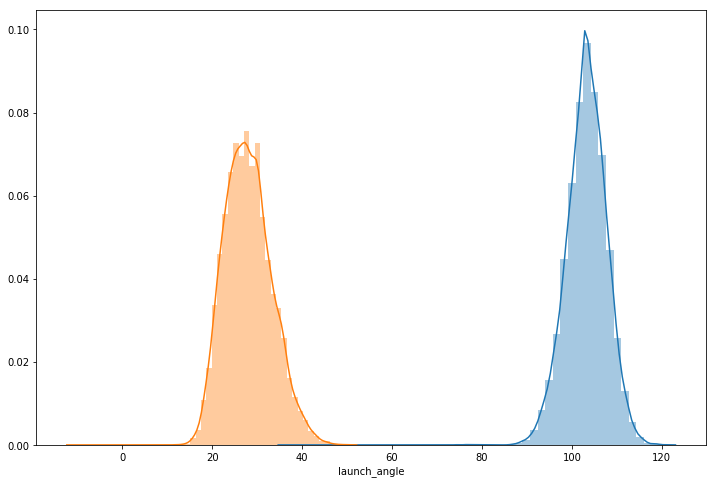

In [36]:
plt.figure(figsize=(12,8))
sns.distplot(hr_df['launch_speed'])
sns.distplot(hr_df['launch_angle'])
#sns.distplot(hr_df['launch_speed_angle'])

In [32]:
hr_df.iso_value.value_counts()

3    16388
Name: iso_value, dtype: int64

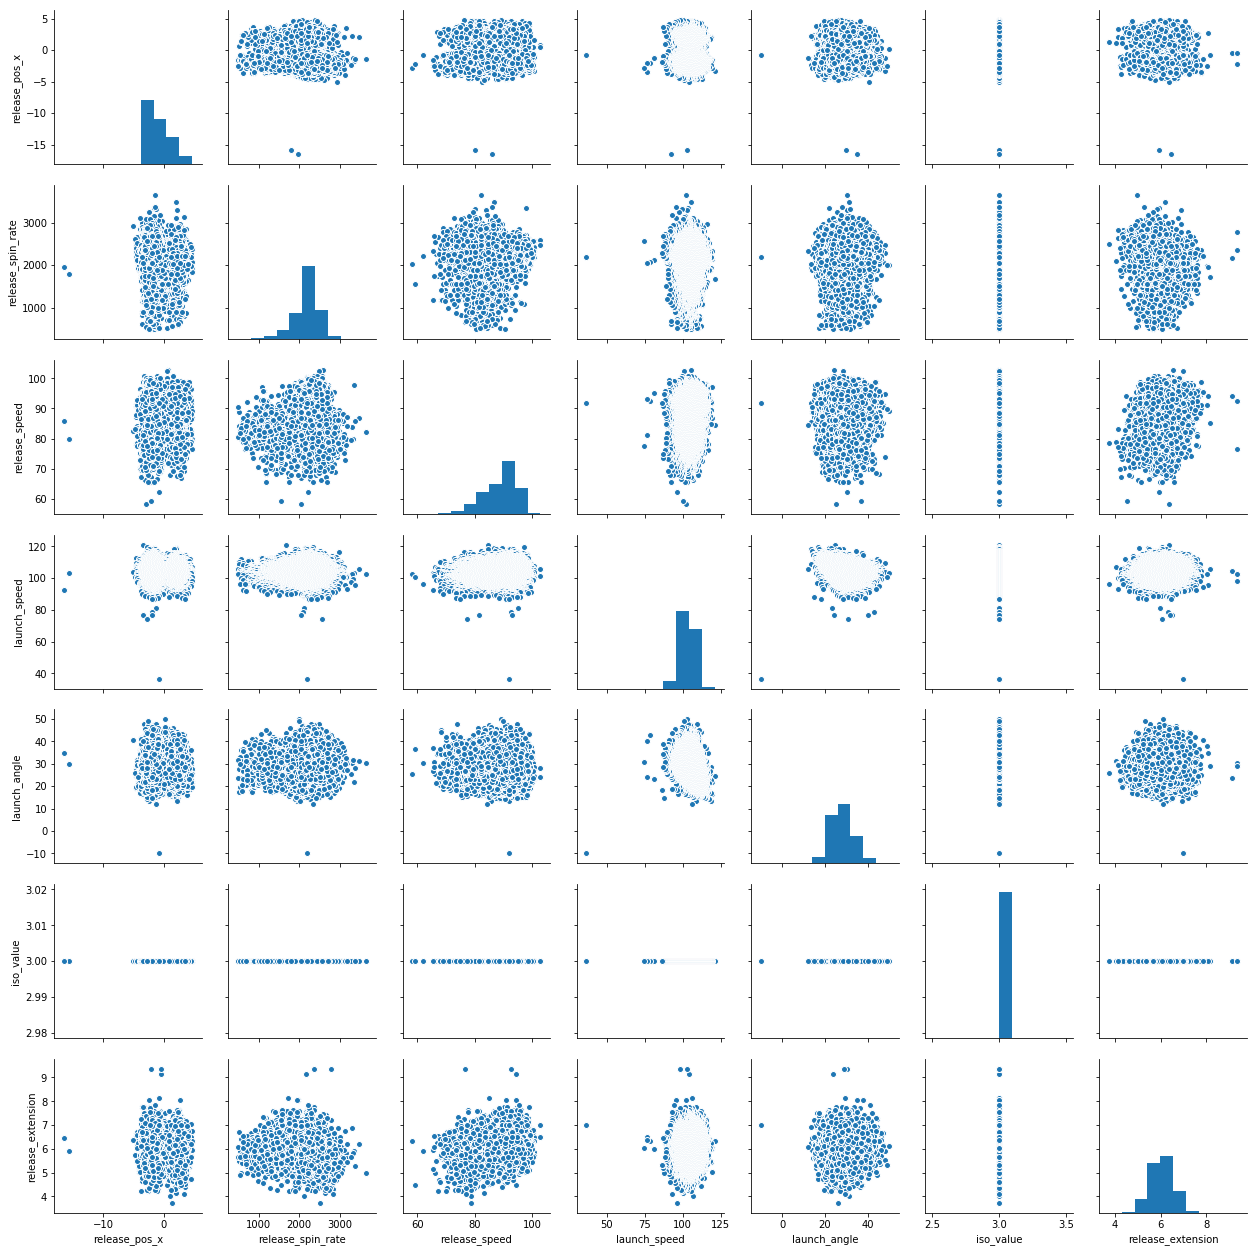

In [42]:
sns.pairplot(hr_df[['pitch_type', 
                    'release_pos_x', 
                    'release_spin_rate', 
                    'release_speed', 
                    'launch_speed', 
                    'launch_angle',
                    'iso_value',
                    'release_extension']])